In [20]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [21]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('LG.csv')


In [22]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [24]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [25]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [26]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 6:4
train_size = int(0.6 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [27]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [28]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.15121464035920373
Coefficients: [0.00047032]
R-squared: 0.4496785888720336


In [30]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [31]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [52]:
# Tính toán các chỉ số đánh giá
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# In ra các chỉ số đánh giá
print("RMSE (Root Mean Squared Error):", rmse)
print("MSE (Mean Squared Error):", mse)
print("MAPE (Mean Absolute Percentage Error): {:.2f}%".format(mape))

RMSE (Root Mean Squared Error): 0.47178039083727785
MSE (Mean Squared Error): 0.22257673717857462
MAPE (Mean Absolute Percentage Error): 114.57%


In [33]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [34]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[192762.34156007 192829.66758392 192896.99360777 192964.31963162
 193031.64565547 193098.97167932 193166.29770317 193233.62372702
 193300.94975087 193368.27577472 193435.60179857 193502.92782242
 193570.25384627 193637.57987012 193704.90589398 193772.23191783
 193839.55794168 193906.88396553 193974.20998938 194041.53601323
 194108.86203708 194176.18806093 194243.51408478 194310.84010863
 194378.16613248 194445.49215633 194512.81818018 194580.14420403
 194647.47022788 194714.79625173]


In [35]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [36]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [37]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

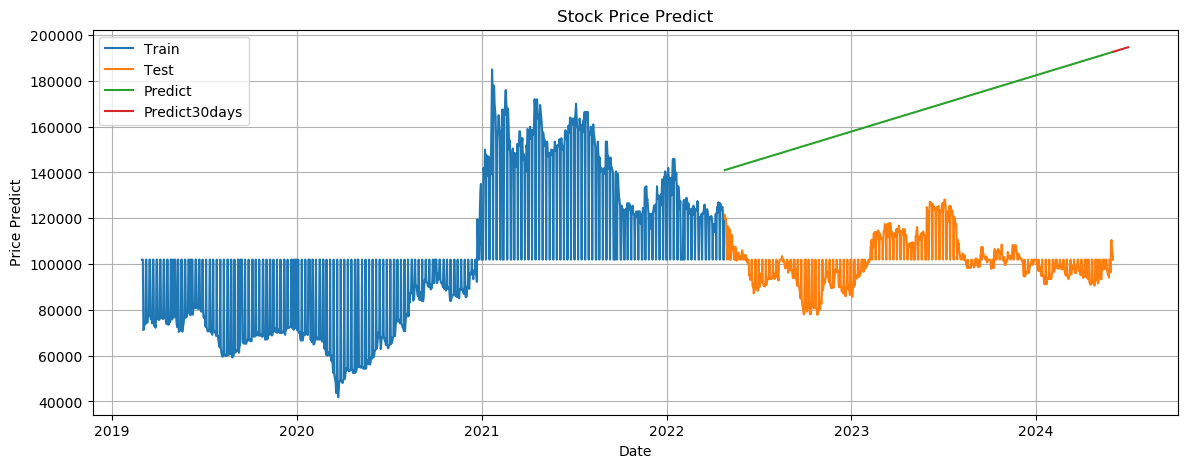

In [47]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [39]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [40]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[192762.34156007 192829.66758392 192896.99360777 192964.31963162
 193031.64565547 193098.97167932 193166.29770317 193233.62372702
 193300.94975087 193368.27577472 193435.60179857 193502.92782242
 193570.25384627 193637.57987012 193704.90589398 193772.23191783
 193839.55794168 193906.88396553 193974.20998938 194041.53601323
 194108.86203708 194176.18806093 194243.51408478 194310.84010863
 194378.16613248 194445.49215633 194512.81818018 194580.14420403
 194647.47022788 194714.79625173 194782.12227558 194849.44829943
 194916.77432328 194984.10034713 195051.42637098 195118.75239483
 195186.07841868 195253.40444253 195320.73046638 195388.05649023
 195455.38251408 195522.70853793 195590.03456178 195657.36058563
 195724.68660949 195792.01263334 195859.33865719 195926.66468104
 195993.99070489 196061.31672874 196128.64275259 196195.96877644
 196263.29480029 196330.62082414 196397.94684799 196465.27287184
 196532.59889569 196599.92491954 196667.250943

In [41]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

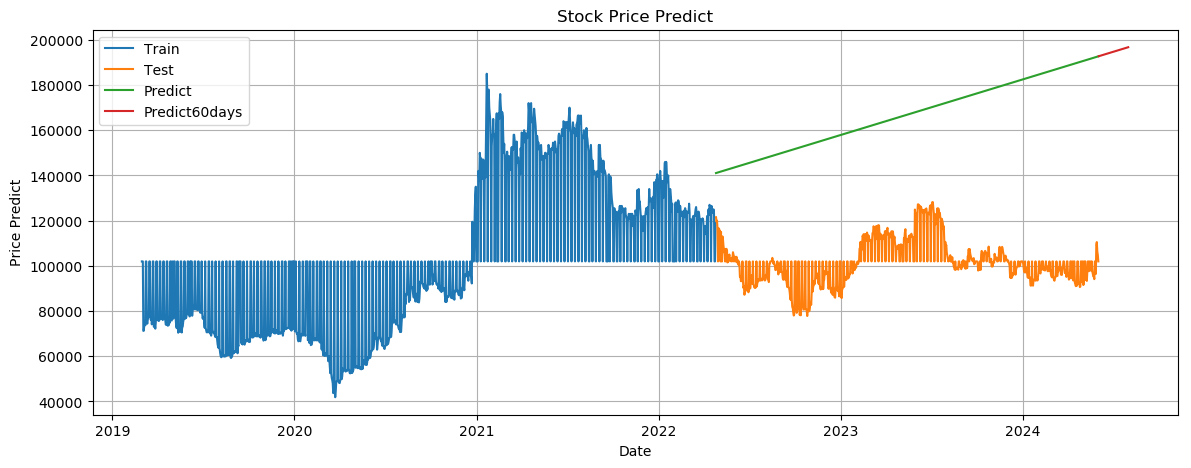

In [48]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [44]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [45]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

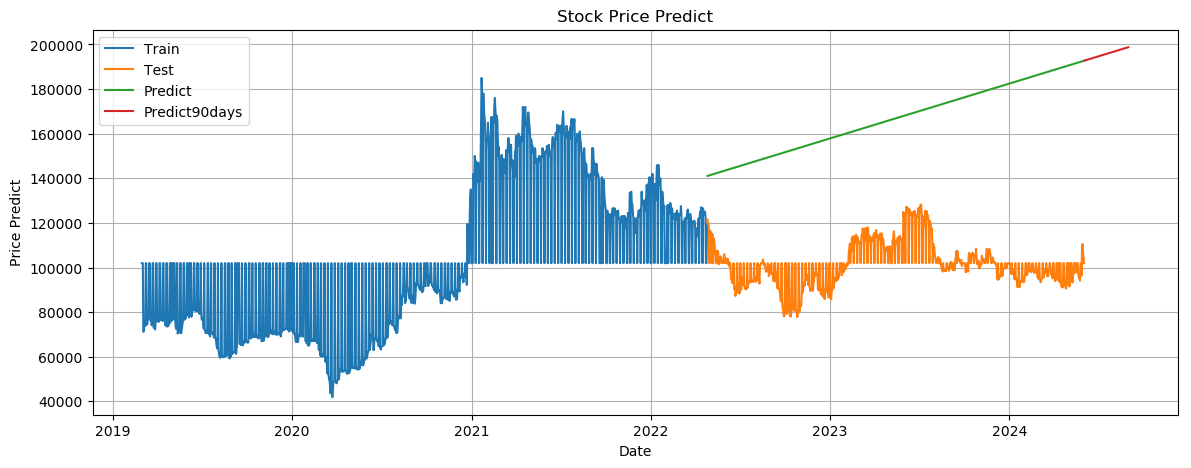

In [49]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()